<a href="https://colab.research.google.com/github/5harad/API-201-2023/blob/main/hw/hw4/hw4-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-201 PROBLEM SET #4
**Due on Thursday, September 28, at 8:00 a.m.**

**I - INSTRUCTIONS**  
To successfully complete this problem set, please follow these steps:

1. **Create a copy of this notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!*** We recommend completing this problem set in Google Chrome.
2. **Insert all your answers into your copy of the document.**
    1. Please include every portion of your submission in this document unless a separate electronic file is explicitly requested.
    3. All numerical calculations should be done in the notebook itself, using R code. If you have to do calculations by hand, include a picture of your handwritten work.
    2. To add an image of handwritten work, screenshots, or anything else, add a new text cell and click the small image icon in the menubar above the cell. After inserting an image, press the `esc` key to show the image. If you have trouble with this method, upload your image to [Freeimage.host](https://freeimage.host), copy a Markdown link, and paste it in a text cell.
3. **Once your document is complete, please save and submit the notebook on Canvas as a PDF.**
    1. Click `View > Expand sections` in the menubar to make sure all work is visible (if it is greyed out then it is already visible).
    1. Click `Runtime > Run all` in the menubar to make sure all of your code is executed.
    1. Click `File > Print` in the menubar and choose the `Save as PDF` option in Chrome to export your notebook as a PDF.
    1. Check to make sure answers do not get cut off - when you go to print the PDF we recommend clicking on `More settings` and setting `Margins` to `None`.
    1. Submit your file on Canvas.


**II - IDENTIFICATION**
1. **Your Full Name:** `     `  

2. **Group Members (classmates with whom you worked on this problem set):**  
    1. `     `
    2. `     `
    3. `     `
    4. `     `
    
3. **Compliance with HKS Academic Code**  
We abide by the Harvard Kennedy School Academic code for all aspects of the course. In terms of problem sets, unless explicitly written otherwise, the norms are the following: You are free (and encouraged) to discuss problem sets with your classmates. However, you must hand in your own unique written work and code in all cases. Any copy/paste of another’s work is plagiarism. In other words, you may work with your classmate(s), sitting side-by-side (physically or remotely!) and going through the problem set question by question, but you must each type your own answers and your own code. For more details, please see syllabus.

    **I certify that my work in this problem set complies with the HKS Academic Code**
    - [ ] Yes
    - [ ] No

---

## Learning Objectives

- To help you understand how to select the appropriate statistics for analyzing data.
- To explore the concept of correlation versus causation in data analysis.


The dataset you'll be working with is the [NLSY-79](https://www.bls.gov/nls/nlsy79.htm) (National Longitudinal Survey of Youth 1979). This is a standardized US government survey that tracked the same individuals over time. This cohort includes people born between 1957 and 1964. In this dataset, we look at a snapshot of 2012 outcomes that cover various aspects of individuals' lives, such as income, employment, education, and family structure, among others.

Analyzing such a dataset can provide insights into the relationship between individual life experiences and economic, education, family outcomes. Such insights can, in turn, help inform better economic and social policy.

Run the cells below to load the data and let's get started!

In [ ]:
# Load the tidyverse and scales libraries
library(tidyverse)
library(scales)

In [ ]:
data <- read_csv("https://5harad.com/datasets/API201/nlsy79_2012.csv")

print("Number of individuals")
nrow(data)
summary(data)

Rows: 12685 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): birth_year, male, poverty, family_income, weeks_unemployed, urban,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of individuals"


[1] 12685

   birth_year        male           poverty       family_income    
 Min.   :1957   Min.   :0.0000   Min.   :0.0000   Min.   :      0  
 1st Qu.:1958   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  16500  
 Median :1960   Median :1.0000   Median :0.0000   Median :  37000  
 Mean   :1960   Mean   :0.5047   Mean   :0.2486   Mean   :  59232  
 3rd Qu.:1962   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:  75001  
 Max.   :1964   Max.   :1.0000   Max.   :1.0000   Max.   :1057448  
                                 NA's   :2491     NA's   :1020     
 weeks_unemployed     urban        number_of_jobs_ever number_children 
 Min.   : 0.000   Min.   :0.0000   Min.   : 0.00       Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:1.0000   1st Qu.: 7.00       1st Qu.:0.0000  
 Median : 0.000   Median :1.0000   Median :11.00       Median :0.0000  
 Mean   : 3.059   Mean   :0.7747   Mean   :12.19       Mean   :0.8568  
 3rd Qu.: 0.000   3rd Qu.:1.0000   3rd Qu.:16.00       3rd Qu.:2.0000  
 Max.   :52.000   Max.  

**Variable Description**

Demographic Variables
   - `birth_year`: The year in which the individual was born.
   - `male`: A binary variable indicating gender, where 0 is female and 1 is male.
   - `urban`: A binary variable indicating the type of area the individual lives in. 0 is for rural and 1 for urban or suburban.

Economic Variables
   - `family_income`: The total family income for the year, in dollars. Varies widely, with a minimum of 0 and a maximum over 1 million.
   - `weeks_unemployed`: The number of weeks the individual was unemployed in the year. Ranges from 0 to 52 weeks.
   - `number_of_jobs_ever`: The total number of jobs the individual has ever held as of 2012.
   - `hours_worked_in_week`: The number of hours the individual typically works in a week, ranging from 0 to 203 hours.
   - `poverty`: A binary variable indicating whether the individual is living in poverty. 0 means not in poverty, and 1 means in poverty.

Education Variables
   - `education`: A numerical variable indicating the individual's level of education:
      1. Less than high school
      2. Some high school
      3. High school graduate
      4. Some college
      5. Associate's degree
      6. Bachelor's degree
      7. Master's or Professional degree
      8. PhD degree
   - `educational_loans`: The total amount of educational loans, in dollars, that the individual owes, ranging from 50 to 299,988 dollars.

Fertility Variables
  - `number_children`: The number of children the individual has, ranging from 0 to 8 children.
  - `age_at_first_child`: The age at which the individual had their first child, ranging from 10 to 51 years.



## Exercise 1
It is important to understand how representative a dataset is of a population (in this case, all US adults of a certain age). Based on the summary data above, answer the following five high-level questions about the sample.

- **How many people are included in the sample?**
- **What is the average age of individuals in the sample (as of 2012 when the survey was taken)?**
- **Is it balanced between men and women?**
- **Is it balanced in terms of the number of people in poverty (for this, look up the US poverty rate online)?**
- **Say there were 30 million adults in the US as of 2012 that were born between 1957 and 1964. What fraction of them are in this sample? Intuitively, do you believe this is enough to be representative?**


### Your answer here!

### START

**How many people are included in the sample?**
12,685

**What is the average age of individuals in the sample (as of 2012 when the outcomes are for)?**
The average birth year in the sample is 1960. As the outcomes are for the year 2012, the average age would be 2012 - 1960 = 52 years.

**Is it balanced between men and women?**
Yes, the mean value for the 'male' variable is 0.5047, which suggests that the sample is approximately balanced between men and women.

**Is it balanced in terms of the number of people in poverty (look up the US poverty rate online)?**
The mean value for the 'poverty' variable is 0.2486 or about 25%. According to U.S. Census data, the poverty rate in 2012 was around 15%. So, this sample has a higher proportion of people in poverty compared to the general population at that time. Or perhaps they use different measures of poverty.

**Say there were 30 million adults in the US as of 2012 that were born between 1957 and 1964. What fraction of them are in this sample? Intuitively, do you believe this is enough to be representative?**
12,685 / 30,000,000 = 0.000423, or 0.04%. While this seems small, a sample size of 12,685 is relatively large and can provide good statistical power.


### END

## Exercise 2
**(a) Apply the `summary()` function to the vector of `family_income` to summarize its distribution in the sample. Are the mean and median different? If so, what does this indicate? Which measure of central tendency (mean, median, or mode) is most appropriate for summarizing `family_income`?**



In [ ]:
# Your answer here!

# START
summary(data$family_income)
# END

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      0   16500   37000   59232   75001 1057448    1020 

**(b) Discuss your results in the text cell below.**

### Your answer here!

### START

The median is significantly less than the mean. There are a small number of people with very high incomes pulling up the average. Given this skewed distribution, the median would be a better measure.


### END

**(c) Use `summary()` to summarize the distribution of `weeks_unemployed` in the sample.**

In [ ]:
# Your answer here!

# START
summary(data$weeks_unemployed)
# END

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   3.059   0.000  52.000     105 

**(d) Is the median a good representation of `weeks_unemployed`? Why or why not?**


### Your answer here!

### START

No, because the median person is not unemployed, and thus has 0 weeks of unemployment in a year. This is not very informative. Thus the mean value of 3 weeks may be better.


### END

**(e) It is often helpful to visualize the distribution. Plot a histogram of `weeks_unemployed`.**

*HINT*: You can use `geom_histogram` to plot a histogram, and can read more about using it [here](https://ggplot2.tidyverse.org/reference/geom_histogram.html).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 105 rows containing non-finite values (`stat_bin()`).”


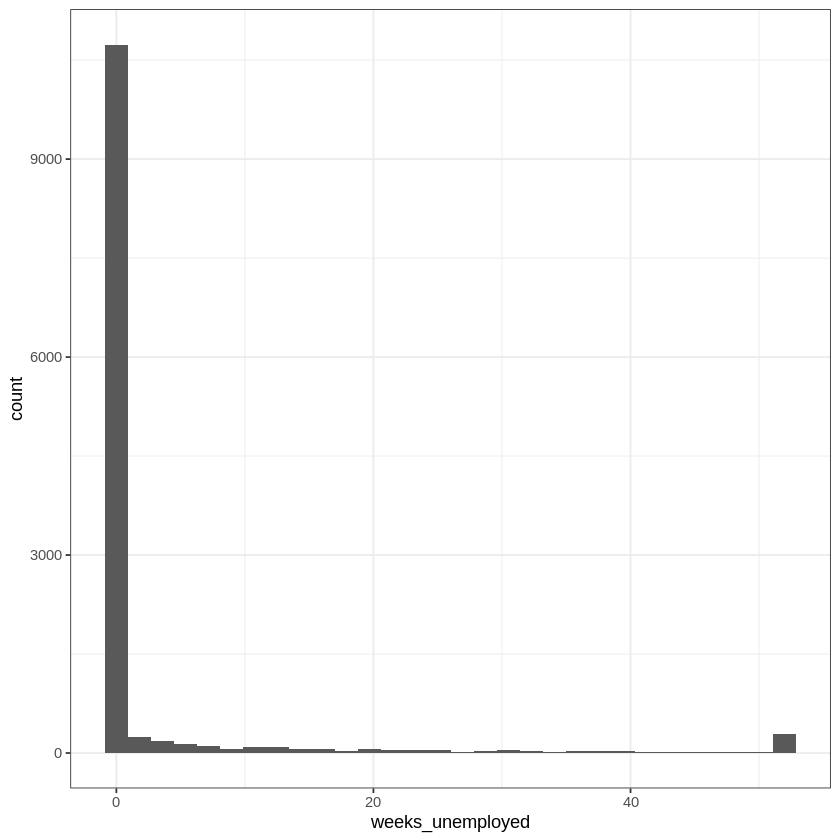

In [ ]:
# Your answer here!

# START
ggplot(data, aes(x=weeks_unemployed)) +
  geom_histogram() +
  theme_bw()
# END

**(f) What accounts for the shape of this distribution?**

### Your answer here!

### START

There is a bi-modal distribution, with most people being employed all year (or most of it), and a small mass of people who are unemployed all year (52 weeks).


### END

**(g) Compute the proportion of people who are unemployed at some point.**

In [ ]:
# Your answer here!

# START
data %>%
  summarize(ever_unemployed = mean(weeks_unemployed > 0, na.rm=TRUE))
# END

ever_unemployed
<dbl>
0.1465819


**(h) Comment on whether you think this is a good measure of unemployment.**

### Your answer here!

### START
Yes, this is a useful measure of unemployment. But it has some limitations, since it does not distinguish between those who have long-term employment vs. those may simply have short gaps between jobs.
### END

## Exercise 3
**(a) Compute the mean and standard deviation of `number_of_jobs_ever`.**

*HINT*: The `sd` function allows you to compute the standard deviation of values. Don't forget `na.rm = TRUE`!

In [ ]:
# Your answer here!

# START
data %>%
  summarize(
    m = mean(number_of_jobs_ever, na.rm = TRUE),
    s = sd(number_of_jobs_ever, na.rm = TRUE)
  )
# END

m,s
<dbl>,<dbl>
12.19011,7.034632


**(b) Describe what these two statistics are telling us.**

### Your answer here!

### START
By 2012, the average person had held 12 jobs. The standard deviation gives us a sense of how spread out the values are around the mean. With a standard deviation of 7 jobs, this means there is a lot of variation in the sample.
### END


**(c) How many years on average does someone hold a job?**

*NOTE*: There are several acceptable ways to estimate this, but explain your logic.

### Your answer here!

### START

2.8 years per job.  The average age in the sample is 52 (average year of birth is 1960 for a survey year of 2012). Let's say the average person starts their first job at age 18. This equates to 34 working years. 34 years / 12 jobs = 2.8.

### END

## Exercise 4

**(a) What is the mean number of children per person? What is the mode?**

*HINT*: [count()](https://dplyr.tidyverse.org/reference/count.html) is a quick way to get the number of observations for each given value of a variable.

In [ ]:
# Your answer here!

# START
data %>%
  summarize(m = mean(number_children))

data %>%
  count(number_children)

# END

m
<dbl>
0.8568388


number_children,n
<dbl>,<int>
0,6525
1,2861
2,2247
3,777
4,218
5,37
6,15
7,4
8,1


### Your answer here!
### Use this space to say what the mean and mode are based on your calculations above

### START
The mean number of children is approximately 0.9 per person.
The mode, or the most frequent number of children, is 0.
### END

**(b) Considering the US fertility rate in 2012 was 1.88 births per woman, is this lower than you thought? Why might account for the difference?**

### Your answer here!

### START

Accept any reasonable answer....could include lack of sample representativeness, differences by sex, time to fertility completion, household composition.


### END

**(c) What is the mean `age_at_first_child`? Compute the average `age_at_first_child` for each `number_children`. Finally, compute the correlation between `number_children` and `age_at_first_child`.**

HINT: You can use `cor()` to compute the correlation between two variables. Add `use = "pairwise.complete.obs` to your `cor()` command to remove `NA` values.

In [ ]:
# Your answer here!

# START
mean(data$age_at_first_child, na.rm=TRUE)

data %>%
  group_by(number_children) %>%
  summarize(mean_age_at_first_child = mean(age_at_first_child, na.rm=TRUE))

cor(data$number_children, data$age_at_first_child, use = "pairwise.complete.obs")
# END

[1] 24.49858

number_children,mean_age_at_first_child
<dbl>,<dbl>
0,NaN
1,24.35343
2,25.11781
3,23.99477
4,22.47907
5,22.70270
6,19.61538
7,22.25000
8,16.00000


[1] -0.04430867

**(d) What does this table tell us about fertility patterns?**

### Your answer here!

### START

Overall, there does not appear to be much correlation between when someone has their first child and how many children they have. Though people with 4+ children do tend to start earlier, than people with 1-3 children. But the former group is relatively small.

### END

## Exercise 5

**(a) Create a histogram of `family_income`. Include appropriate axis labels.**

*HINT*: You can pass in `labels = comma` to your `scale_` command to avoid scientific notation.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1020 rows containing non-finite values (`stat_bin()`).”


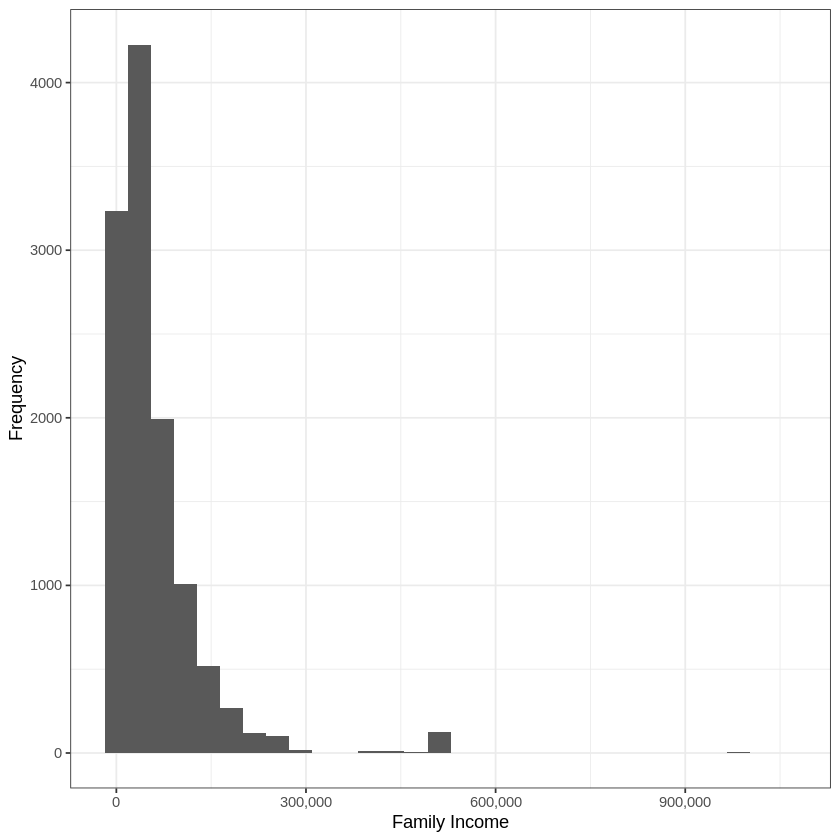

In [ ]:
# Your answer here!

# START
ggplot(data, aes(x=family_income)) +
  geom_histogram() +
  scale_x_continuous(name = "Family Income", labels = comma) +
  scale_y_continuous(name = "Frequency") +
  theme_bw()
# END

**(b) Briefly describe what the shape of this distributions tells us.**

### Your answer here!

### START
The histogram is skewed to the right, as we would expect, indicating that most people have lower family incomes. There also appears to be bunching in reporting of income somewhere around $400,000.
### END

**(c) Summarize family income at each level of education. Then make a line plot to visualize the relationship between education and family income.**

Recall that `education` is a numerical variable indicating the individual's level of education:

      1. Less than high school
      2. Some high school
      3. High school graduate
      4. Some college
      5. Associate's degree
      6. Bachelor's degree
      7. Master's or Professional degree
      8. PhD degree



education,family_income
<dbl>,<dbl>
0,31479.03
1,52553.82
2,72155.78
3,108730.85
4,108554.24
5,128565.07
6,175250.26
7,207624.82
8,84033.90


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


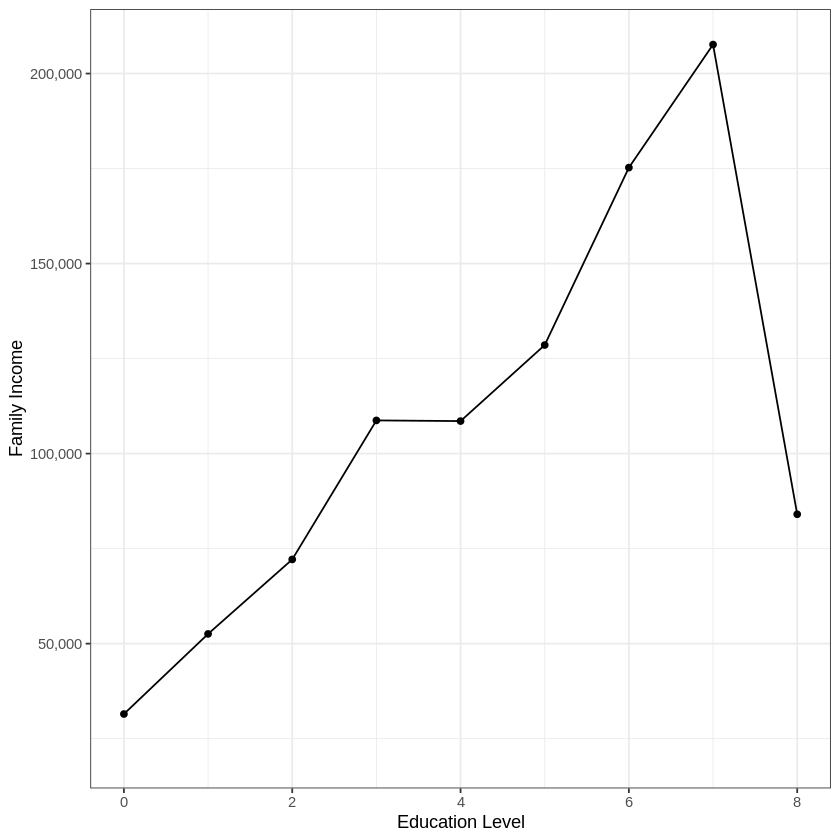

In [ ]:
# Your answer here!

# START
income_by_education <- data %>%
    group_by(education) %>%
    summarize(family_income=mean(family_income, na.rm=TRUE))

income_by_education

ggplot(income_by_education, aes(x=education, y=family_income)) +
  geom_point() +
  geom_line() +
  scale_x_continuous(name = "Education Level") +
  scale_y_continuous(name = "Family Income", labels = comma) +
  theme_bw()
# END

**(d) What is the relationship between education level and family income? Does this relationship imply that education _causes_ higher income? If not, explain what else might be driving the pattern.**

### Your answer here!

### START

The plot suggests a strong positive relationship between education and family income. However, there is a drop among PhDs, which may due to lower salaries in academia compared to people with professional degrees (MBAs, MDs, lawyers).

And no, correlation does not imply causation! It simply shows that there is a relationship between the two variables. In theory, it may simply be that people how grew up wealthy both tend to be wealthy themselves, and tend to pursue more education, even if that education does not directly impact their own earnings.
### END

## Exercise 6

**(a) Student loans: create a similar line plot as the one above, except now  show mean family income at each quintile of educational debt.**

To get started, run the cell below to create the `edu_loan_quintile` column, which divides student loan amounts into 5 groups, with 1 being the lowest amount of student debt, and 5 being the highest. (To create quintiles, we use the handy [ntile()](https://dplyr.tidyverse.org/reference/ntile.html) function.)

In [ ]:
data <- data %>%
  mutate(edu_loan_quintile = ntile(educational_loans, 5))

edu_loan_quintile,family_income
<int>,<dbl>
1,65060.30
2,79034.81
3,86193.37
4,99666.19
5,105446.06
NA,50932.13


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


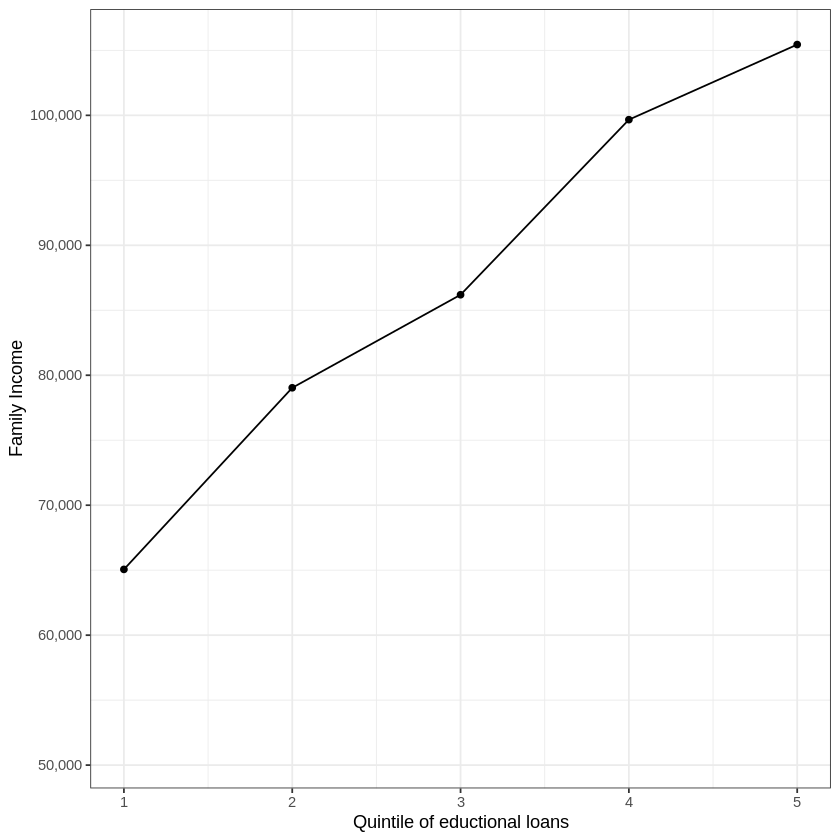

In [ ]:
# Your answer here!

# START
income_by_debt <- data %>%
    group_by(edu_loan_quintile) %>%
    summarize(family_income = mean(family_income, na.rm=TRUE))

income_by_debt

ggplot(income_by_debt, aes(x=edu_loan_quintile, y=family_income)) +
  geom_point() +
  geom_line() +
  scale_x_continuous(name = "Quintile of eductional loans") +
  scale_y_continuous(name = "Family Income", labels = comma) +
  theme_bw()
# END

 **(b) What is the general relationship between family income and student debt? Why might some people be concerned that student loan forgiveness is a regressive policy?**

### Your answer here!

### START
People with the highest student debt also have the highest family income. A regressive policy is one that advantages the wealthy. In this case, student loan forgiveness is more likely to help high income people than low income people.
### END

## Exercise 7

We previously used the `cor()` function to compute the correlation between two variables. More generally, the `cor()` function can be used to create a correlation matrix for all combinations of variables in a dataset.

In [ ]:
# Run this code
cor_matrix <- cor(data, use = "pairwise.complete.obs")
round(cor_matrix, 3) # This rounds the output to 3 decimal places for ease of reading


,birth_year,male,poverty,family_income,weeks_unemployed,urban,number_of_jobs_ever,number_children,age_at_first_child,hours_worked_in_week,education,educational_loans,edu_loan_quintile
birth_year,1.000,0.008,0.096,0.060,0.025,-0.014,0.136,0.057,0.037,0.043,-0.043,0.059,0.077
male,0.008,1.000,-0.044,0.019,0.054,0.002,0.096,-0.106,0.204,0.155,-0.041,-0.050,-0.039
poverty,0.096,-0.044,1.000,-0.178,0.055,0.005,-0.031,0.011,-0.212,-0.017,-0.133,-0.020,-0.071
family_income,0.060,0.019,-0.178,1.000,-0.140,0.034,-0.075,0.140,0.345,0.016,0.335,0.103,0.150
weeks_unemployed,0.025,0.054,0.055,-0.140,1.000,0.016,0.112,-0.075,-0.057,0.102,-0.081,0.019,-0.003
urban,-0.014,0.002,0.005,0.034,0.016,1.000,0.051,-0.015,0.064,-0.007,0.045,0.033,0.032
number_of_jobs_ever,0.136,0.096,-0.031,-0.075,0.112,0.051,1.000,-0.071,0.074,0.223,0.052,0.103,0.120
number_children,0.057,-0.106,0.011,0.140,-0.075,-0.015,-0.071,1.000,-0.044,-0.039,0.088,-0.014,0.027
age_at_first_child,0.037,0.204,-0.212,0.345,-0.057,0.064,0.074,-0.044,1.000,0.026,0.340,0.047,0.140
hours_worked_in_week,0.043,0.155,-0.017,0.016,0.102,-0.007,0.223,-0.039,0.026,1.000,0.002,0.065,0.037


**Study the correlations above. Choose two instances where the correlation is interesting or surprising to you. Explain your choices.**

### Your answer here!

### START

Many possible answers!

### END